### Introduction to regression with  NN in Tensorflow
Simplified: Predict number based on some variables

In [1]:
import tensorflow as tf
tf.__version__

2025-05-25 16:40:03.800439: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-25 16:40:03.810358: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-25 16:40:03.931195: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-25 16:40:04.039173: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748184004.124024   16726 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748184004.15

'2.19.0'

### Create some data to view and fit

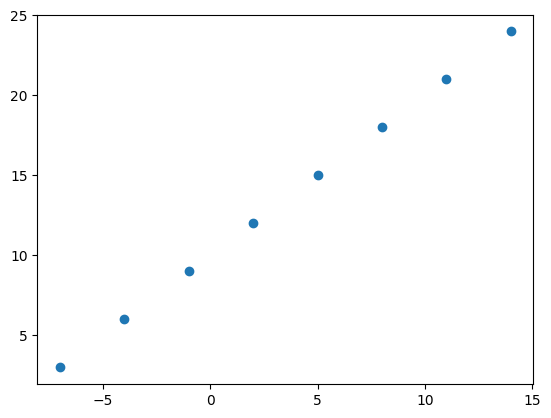

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.arange(-7.0, 14.0+1, 3.0) # +1 because arange excludes stop val

# Create labels
y = np.arange(3, 24+1, 3, dtype=np.float32)
plt.scatter(X, y)
# y == X + 10

### Input and output shapes

In [3]:
# Create a demo tensor for a housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2025-05-25 16:40:09.490451: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [5]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

In [6]:
X, y = tf.reshape(X, (8,1)), tf.reshape(y, (8,1))

## Steps in modelling with TensorFlor

1. Create input and output layers as well as hidden layers
2. Compile a model - define the loss function (shows how wrong model is) and optimizer (tells model how to improve to the patterns it's learning) and evaluation metrics (metrics to interpret performance of model)
3. FItting a model - letting model find patterns between features and labels.

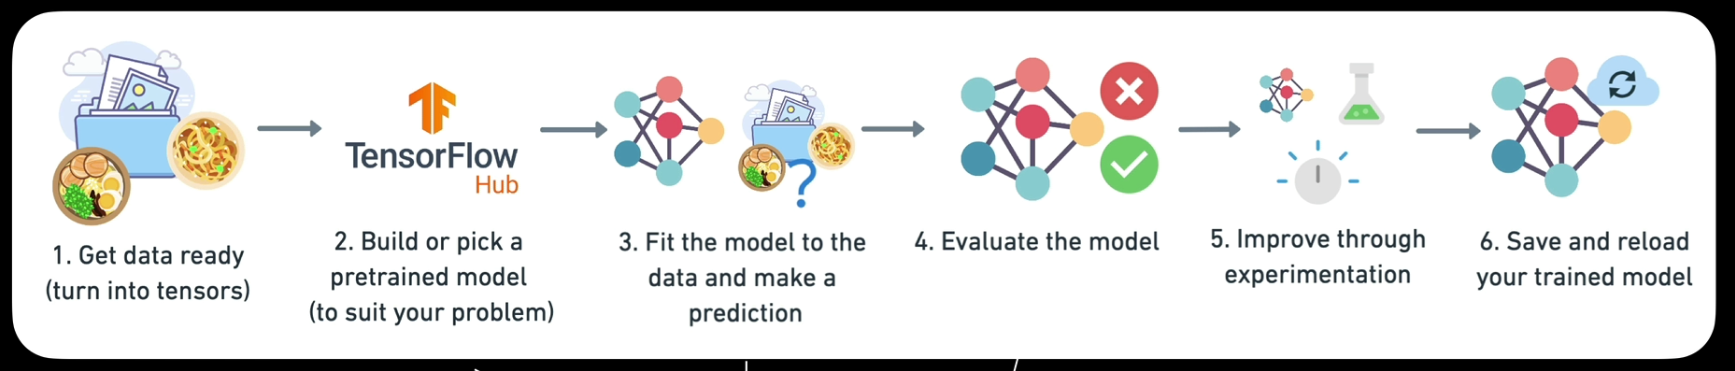

In [7]:
# Set random seed
import keras.models as models
import keras.layers as layers

import keras.optimizers as optimizers
import keras.losses as losses

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = models.Sequential(
    [
        layers.Dense(1)
        ]
    )
# other way to add layers is by model.add(tf.keras.layers.Dense(1))
# 2. Compile
model.compile(
    loss=losses.MeanAbsoluteError, # Mean absolute error to describe how off the model is
    optimizer=optimizers.SGD(), # Stochastict gradient descent to optimize the model
    # metrics=["mae"] # Use MAE as a metric how well the model works
    )

# 3. Fit the model
model.fit(
    X, 
    y, 
    epochs=5 # Number of learning iterations, so it means x number of chances to learn the pattern
    )



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 10.7513
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 10.6188
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 10.4863
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 10.3538
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 10.2213


In [8]:
# Try make a prediction with model
import numpy as np

new_data = np.array([[14.0]])
y_predicted = model.predict(new_data)
y_predicted, y_predicted + 9.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


(array([[13.494684]], dtype=float32), array([[22.994684]], dtype=float32))

### Improve model

We can improve model by altering on step of creating it, so create compile and fit.

1. **Creating a model** - here we can add more layers, increase the number of hidden units (neurons) in each layer, change the activation function of each layer.
2. **Compile a model** - change optimization function or perhaps **learning rate** of optimization function.
3. **FItting a model** - fit model for more epochs (train it for more iterations) or on more data so give the model more examples to lear on.


while improving we want to experiment a lot, that cost time, this is why, we should before scaling the model a lot, try and experiment with smaller models. Do the smallest change possible and see what happens.

In [16]:
# Set random seed
import keras.models as models
import keras.layers as layers

import keras.optimizers as optimizers
import keras.losses as losses

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = models.Sequential(
    [
        layers.Dense(1)
        ]
    )
# other way to add layers is by model.add(tf.keras.layers.Dense(1))
# 2. Compile
model.compile(
    loss=losses.MeanAbsoluteError, # Mean absolute error to describe how off the model is
    optimizer=optimizers.SGD(), # Stochastict gradient descent to optimize the model
    # metrics=["mae"] # Use MAE as a metric how well the model works
    )

# 3. Fit the model
model.fit(
    X, 
    y, 
    epochs=40 # Number of learning iterations, so it means x number of chances to learn the pattern
    )



Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 17.5188
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 17.2376
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 16.9563
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 16.6751
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 16.3938
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 16.1126
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 15.8313
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 15.5501
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 15.2688
Epoch 10/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 14.9876
Epoch 11/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 14.7667
Epoch 12/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 14.6342
Epoch 13/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 14.5017
Epoch 14/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 14.3692
Epoch 15/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 14.2367
Epoch

In [10]:
model.predict(np.array([14.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[25.580357]], dtype=float32)

My change

In [11]:
model = models.Sequential()
model.add(layers.Dense(1))

model.compile(loss=losses.MeanAbsoluteError, optimizer=optimizers.Adam(learning_rate=0.01), metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 19.1959 - mae: 19.1959
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 19.1359 - mae: 19.1359
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 19.0759 - mae: 19.0759
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 19.0159 - mae: 19.0159
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 18.9559 - mae: 18.9559
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 18.8959 - mae: 18.8959
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 18.8359 - mae: 18.8359
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 18.7759 - mae: 18.7759
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 18.7159 - mae: 18.7159
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 18.6559 - mae: 18.6559
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 18.5959 - mae: 18.5959
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 18.5359 - mae: 18.5359
Epoch 13/100


In [12]:
model.predict(np.array([-3]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[1.7045355]], dtype=float32)

### Another improvement, add hidden layer with 100 neurons

**learning rate is one of the most important hyper-parameters for many neural networks.**

#### Hyperparameters

Parameters that can be tweak directly by the user.

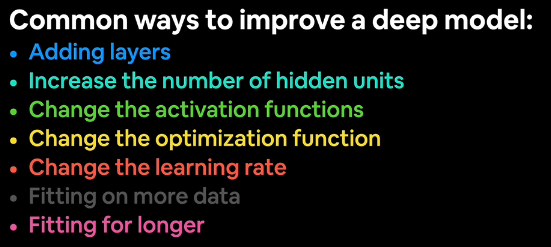

In [13]:
model = models.Sequential()
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(1))

model.compile(optimizers.Adam(learning_rate=0.01),losses.MeanAbsoluteError, metrics=["mae"])

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - loss: 14.3229 - mae: 14.3229
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 13.5332 - mae: 13.5332
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 12.7531 - mae: 12.7531
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 11.9754 - mae: 11.9754
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 11.1960 - mae: 11.1960
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 10.6010 - mae: 10.6010
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 10.0577 - mae: 10.0577
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 9.4958 - mae: 9.4958
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 8.9158 - mae: 8.9158
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 8.3171 - mae: 8.3171
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 7.6950 - mae: 7.6950
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 7.0456 - mae: 7.0456
Epoch 13/100
1/1 ━━━━━━

In [14]:
np.arange(-7, 18, 3), model.predict(np.arange(-7, 18, 3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


(array([-7, -4, -1,  2,  5,  8, 11, 14, 17]),
 array([[ 3.350308 ],
        [ 5.9486666],
        [ 9.258621 ],
        [12.101014 ],
        [15.028743 ],
        [18.029243 ],
        [21.09826  ],
        [24.192385 ],
        [27.360153 ]], dtype=float32))

In [15]:
model.predict(np.array([4]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[14.028576]], dtype=float32)

### Evaluating the model

Visualization is the most important part of evaluating.

It's a good idea to visualize:

* The data - what data we work with, how is it looks like
* The model itself - what does the model look like?
* The training of a model - how does a model perform while  it learns?
* The predictions of a model - how the predictions of model line up against the ground truth (the original labels)?

In [18]:
# Make a bigger dataset
X =  tf.range(-100, 100, 4, dtype=tf.float32)
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [19]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

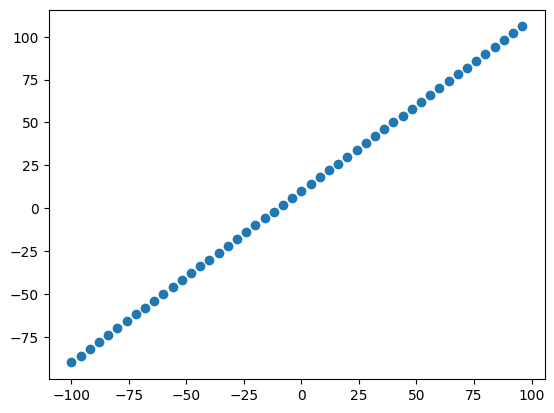

In [20]:
# Visualize the data
plt.scatter(X, y)
plt.show()

### The 3 sets

data now can be split into 3 datasets:
* **training**, the model learns from this data ~ 70-80%
* **validation**, the model gets tuned on this data ~ 10-15%
* **testing**, the model gets evaluated on this data to test what it'(ha)s learned ~ 10-15%

In [ ]:
int(len(X)*0.8)

40

In [27]:
# In this case we split data in two sets, training and testing.

X_train, X_test, y_train, y_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):], y[:int(len(y)*0.8)], y[int(len(y)*0.8):]
X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

### Visualize the data

After training and test set split.

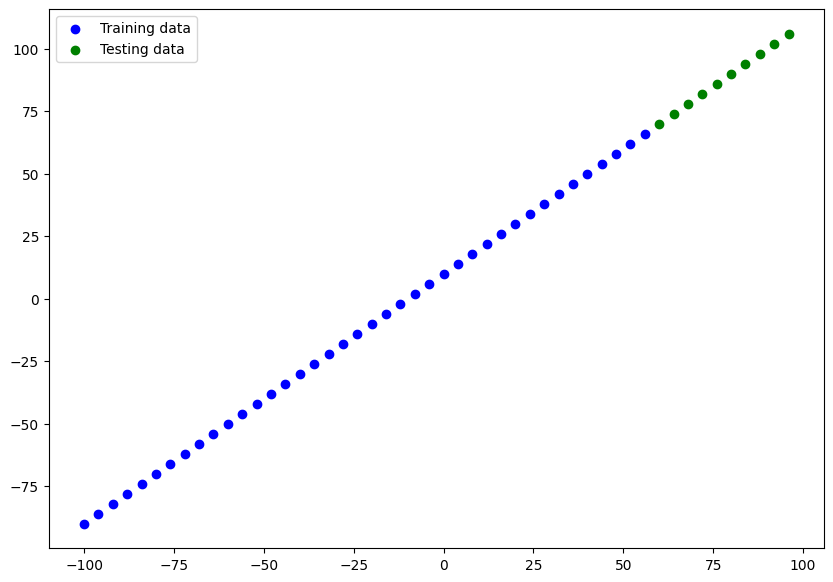

In [29]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend(); # ; to not show output of matplotlib

### Create a model again

In [ ]:
model = models.Sequential()
model.add(layers.Dense(1))

model.compile(optimizers.Adam(learning_rate=0.01),)